In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My\ Drive/Projects/Epidemic\ Control\ Portal/FYP/Genomic

/content/drive/.shortcut-targets-by-id/1aCPQAeC2tHBLx06_jt8sdd_-fseDZRw7/FYP/Genomic


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_excel("Clean genomic dataset.xlsx")

data.tail(5)

,Virus name,Virus family,DNA(0)/RNA(1),Virus genus,Average genome length (Nucleotides),Replication in the cytoplasm (True:1),Vector-borne or not (True:1),enveloped/non-enveloped (True:1),vSegmentedTF (True:1),Zoonotic or not (True:1)
540,Zaire_ebolavirus,Filoviridae,1,Ebolavirus,18898,1,0,0,0,1
541,Zika_virus,Flaviviridae,1,Flavivirus,10794,1,1,0,0,1
542,Sars-cov-2,Coronaviridae,1,Betacoronavirus,29811,1,0,0,0,1
543,H1N1,Orthomyxovirida,1,Alphainfluenzavirus,2341,1,0,1,1,1
544,Mers-Cov,Coronaviridae,1,Betacoronavirus,30000,1,0,1,0,1


In [ ]:
data['Virus family'] = LabelEncoder().fit_transform(data['Virus family'])

In [ ]:
X = data[['Virus family','vSegmentedTF (True:1)', 'Vector-borne or not (True:1)', 'enveloped/non-enveloped (True:1)', 
          'DNA(0)/RNA(1)', 'Replication in the cytoplasm (True:1)','Average genome length (Nucleotides)']].values
Y = data['Zoonotic or not (True:1)'].values

#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

train_len = int(0.9*len(X))
x_train, x_test, y_train, y_test = X[:train_len], X[train_len:], Y[:train_len], Y[train_len:]

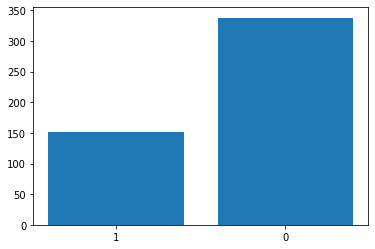

In [ ]:
plt.bar(height=[np.sum(y_train), len(y_train)- np.sum(y_train)], x=['1', '0'])
plt.show()

In [ ]:
(len(y_train)- np.sum(y_train))/len(y_train)

0.689795918367347

In [16]:
len(x_test)

55

### Modelling

###### Machine learning algorithms

In [ ]:
#importing libraries for ML and performance measures

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Modelling the data, multiple ML models were used and Grid seacrh was used to seacrh for the best parameters for those models 
#Accuracy was used as performance measure

def ML_modeling(models, params, X_train, X_test, y_train, y_test):    
    
    if not set(models.keys()).issubset(set(params.keys())):
        raise ValueError('Some estimators are missing parameters')

    for key in models.keys():
        model = models[key]
        param = params[key]
        gs = GridSearchCV(model, param, cv=5, error_score=0, refit=True, scoring = 'accuracy')
        gs.fit(X_train, y_train)
        y_pred = gs.predict(X_test)
        
        # Print scores for the classifier
        print(key, ':', gs.best_params_)
        print("Accuracy: %1.3f ROC_AUC: %1.3f" % (accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred)))
    
    return

models = {
    'Perceptron': MLPClassifier(),
    'Decision Tree': DecisionTreeClassifier(),  
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian': GaussianProcessClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'LR': LogisticRegression(),
    'XG Boost': GradientBoostingClassifier()
}

params = {
    'SVM' : {'C': [1, 10], 'kernel': ["linear", "poly", "rbf", "sigmoid"]},
    'Decision Tree': {'min_samples_split': [15, 20, 25, 30], 'criterion': ["gini","entropy"], "splitter": ["random", "best"] }, 
    'Perceptron': {'alpha': [0.0001, 0.001], 'activation': ['tanh', 'logistic', 'relu'], 'hidden_layer_sizes': [10, 50, 5], 'max_iter': [100, 200, 500] },
    'Random Forest': {'n_estimators': [100, 300], 'criterion': ["gini","entropy"]},
    'KNN': {'n_neighbors': [5,10,15], 'weights':['uniform', 'distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'AdaBoost': {'n_estimators': [20, 50, 100], 'algorithm': ['SAMME', 'SAMME.R']},
    'Gaussian': {},
    'Naive Bayes': {},
    'XG Boost' : {},
    'LR': {}
}

ML_modeling(models, params, x_train, x_test, y_train, y_test)

Perceptron : {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 10, 'max_iter': 200}
Accuracy: 0.473 ROC_AUC: 0.500
Decision Tree : {'criterion': 'gini', 'min_samples_split': 15, 'splitter': 'random'}
Accuracy: 0.582 ROC_AUC: 0.592
Random Forest : {'criterion': 'gini', 'n_estimators': 100}
Accuracy: 0.564 ROC_AUC: 0.562
KNN : {'algorithm': 'brute', 'n_neighbors': 10, 'weights': 'uniform'}
Accuracy: 0.527 ROC_AUC: 0.542
AdaBoost : {'algorithm': 'SAMME.R', 'n_estimators': 50}
Accuracy: 0.527 ROC_AUC: 0.524
Gaussian : {}
Accuracy: 0.600 ROC_AUC: 0.613
Naive Bayes : {}
Accuracy: 0.491 ROC_AUC: 0.517
SVM : {'C': 1, 'kernel': 'poly'}
Accuracy: 0.473 ROC_AUC: 0.500
LR : {}
Accuracy: 0.473 ROC_AUC: 0.500
XG Boost : {}
Accuracy: 0.655 ROC_AUC: 0.656


##### Deep Learning

In [ ]:
import tensorflow as tf

In [ ]:
i = tf.keras.layers.Input(shape=x_train.shape[1])

x = tf.keras.layers.Dense(64, activation='relu')(i)

x = tf.keras.layers.Dense(32, activation='relu')(x)

y = tf.keras.layers.Dense(1, activation='sigmoid')(x)

mlp = tf.keras.models.Model(i, y, name='mlp')

mlp.compile('adam', 'binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

In [ ]:
mlp.fit(x_train, y_train, batch_size=8, epochs=50)

Epoch 1/50
62/62 [==============================] - 0s 2ms/step - loss: 1086.7284 - accuracy: 0.5755 - auc: 0.5035
Epoch 2/50
62/62 [==============================] - 0s 1ms/step - loss: 47.0177 - accuracy: 0.6286 - auc: 0.5267
Epoch 3/50
62/62 [==============================] - 0s 1ms/step - loss: 41.0935 - accuracy: 0.6184 - auc: 0.5002  
Epoch 4/50
62/62 [==============================] - 0s 1ms/step - loss: 32.2779 - accuracy: 0.5531 - auc: 0.4739
Epoch 5/50
62/62 [==============================] - 0s 967us/step - loss: 36.7262 - accuracy: 0.6000 - auc: 0.5075
Epoch 6/50
62/62 [==============================] - 0s 1ms/step - loss: 38.9304 - accuracy: 0.5694 - auc: 0.4761
Epoch 7/50
62/62 [==============================] - 0s 1ms/step - loss: 62.7128 - accuracy: 0.5857 - auc: 0.4905
Epoch 8/50
62/62 [==============================] - 0s 1ms/step - loss: 58.6772 - accuracy: 0.5714 - auc: 0.4861
Epoch 9/50
62/62 [==============================] - 0s 1ms/step - loss: 83.1749 - accuracy

In [ ]:
mlp.evaluate(x_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 18.1396 - accuracy: 0.5818 - auc: 0.4531


[18.139596939086914, 0.581818163394928, 0.453125]

#### Conclusion



Since there is imbalance in class distribution, we use ROC_AUC metric to check the performance of the algorithm. Higher the ROC_AUC metric better the performance. 

1.  With ML algorithms adaboost achieves the best ROC_AUC score of 0.78 with an accuracy of 80%.

2.  With DL we achieve the ROC_AUC score of 0.45 with an accuracy of 58%.
 
